In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv(os.path.join(dirname, filename))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [4]:
df['review'] = df['review'].apply(lambda x:x.lower())

In [5]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
df['review'] = df['review'].apply(lambda x:''.join([c for c in x if c not in punctuation ]))

In [7]:
vclist = df['review'].str.split(expand=True).stack().value_counts()

In [8]:
type(vclist)

pandas.core.series.Series

In [9]:
vcdict = vclist.to_dict()

In [10]:
len(vcdict)

181685

In [11]:
vocab_to_int = {w:i+1 for i,w in zip(range(len(vcdict)), vcdict.keys())}
vocab_to_int

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'it': 8,
 'i': 9,
 'this': 10,
 'that': 11,
 'br': 12,
 'was': 13,
 'as': 14,
 'with': 15,
 'for': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'he': 27,
 'one': 28,
 'its': 29,
 'at': 30,
 'all': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'from': 35,
 'who': 36,
 'so': 37,
 'like': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'about': 42,
 'if': 43,
 'has': 44,
 'out': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'my': 53,
 'even': 54,
 'no': 55,
 'up': 56,
 'would': 57,
 'she': 58,
 'time': 59,
 'only': 60,
 'which': 61,
 'really': 62,
 'their': 63,
 'see': 64,
 'were': 65,
 'story': 66,
 'had': 67,
 'can': 68,
 'me': 69,
 'than': 70,
 'we': 71,
 'much': 72,
 'well': 73,
 'been': 74,
 'get': 75,
 'will': 76,
 'other': 77,
 'do': 78,
 'great': 79,
 'also': 80,
 'into': 81,
 'bad': 82,
 'be

In [26]:
len(vocab_to_int)

181685

In [12]:
def customfxn(row):
    wordlist = []
    for eachword in row['review'].split():
        wordlist.append(vocab_to_int[eachword])
    return wordlist

df['wordlist'] = df.apply(customfxn, axis=1)

In [13]:
df['sentiment'] = df['sentiment'].apply(lambda x:1 if x == 'positive' else 0)

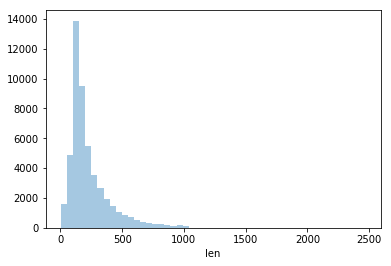

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
df['len'] = df['wordlist'].apply(lambda x:len(x))
sns.distplot(df['len'],kde=False)

In [15]:
df['len'].describe()

count    50000.000000
mean       230.258240
std        170.663887
min          4.000000
25%        126.000000
50%        172.000000
75%        280.000000
max       2469.000000
Name: len, dtype: float64

In [16]:
limit = 400
def padOperation(row):
    if limit>row['len']:
        nz = limit - row['len']
        newWordList = [0 for i in range(nz)] + row['wordlist']
    else:
        newWordList = [i for i in row['wordlist'][:limit]]
    return newWordList
        
    
df['PZwordlist'] = df.apply(padOperation,axis=1)


In [17]:
df.columns

Index(['review', 'sentiment', 'wordlist', 'len', 'PZwordlist'], dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
X = df[['review', 'wordlist', 'len', 'PZwordlist']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)

(40000, 4)


In [19]:
y_test

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64

In [20]:
traindata = X_train['PZwordlist'].to_numpy()
testdata = X_test['PZwordlist'].to_numpy()
trainlabel = y_train.to_numpy()
testlabel = y_test.to_numpy()
trainlabel

array([0, 0, 1, ..., 0, 1, 1])

In [21]:
traindata2 = np.asarray([x for x in traindata])
testdata2 = np.asarray([x for x in testdata])
traindata2



array([[  174,    48,     9, ...,   209,   342,  3903],
       [    0,     0,     0, ...,    89,   103,     8],
       [    0,     0,     0, ...,     2,   740,    66],
       ...,
       [    0,     0,     0, ...,  1592,     2,   635],
       [    0,     0,     0, ...,   122,  7597, 15734],
       [    0,     0,     0, ...,    65,    72,  1959]])

In [25]:
traindata2.shape

(40000, 400)

In [22]:
# import torch
# from torch.utils.data import DataLoader, TensorDataset
# # create Tensor datasets
# print(torch.from_numpy(traindata2))
# print(torch.from_numpy(trainlabel))
# train_data3 = TensorDataset(torch.from_numpy(traindata2), torch.from_numpy(trainlabel))
# test_data3 = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

In [23]:
X.shape

(50000, 4)

In [27]:
import keras
import tensorflow as tf
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import ReLU

embed_dim = 400
lstm_out = 256
batch_size = 32

from keras.layers import Activation, Dense

model = keras.models.Sequential()
model.add(keras.layers.Embedding(275000, embed_dim,input_length = limit))
model.add(keras.layers.LSTM(lstm_out, dropout = 0.25, recurrent_dropout = 0.24))
model.add(keras.layers.Dense(2))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 400)          110000000 
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               672768    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 110,673,282
Trainable params: 110,673,282
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
trainlabel

array([0, 0, 1, ..., 0, 1, 1])

In [29]:
type(traindata2)
type(trainlabel)

numpy.ndarray

In [30]:
print(traindata2)
print(trainlabel)

[[  174    48     9 ...   209   342  3903]
 [    0     0     0 ...    89   103     8]
 [    0     0     0 ...     2   740    66]
 ...
 [    0     0     0 ...  1592     2   635]
 [    0     0     0 ...   122  7597 15734]
 [    0     0     0 ...    65    72  1959]]
[0 0 1 ... 0 1 1]


In [31]:
from keras.utils import to_categorical
y_binary = to_categorical(trainlabel)

In [32]:
y_binary

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [33]:
len(vocab_to_int)

181685

In [34]:
traindata2.shape

(40000, 400)

In [35]:
y_binary.shape

(40000, 2)

In [36]:
# model.fit(traindata2,y_binary, batch_size =100, epochs = 10,  verbose = 1)

In [37]:
# model.predict(testdata2)

In [40]:
from keras.layers import Bidirectional, LSTM, Dropout


model = keras.models.Sequential()
model.add(keras.layers.Embedding(75000, embed_dim,input_length = limit))
model.add(Bidirectional(LSTM(64)))
# model.add(keras.layers.LSTM(lstm_out, dropout = 0.25, recurrent_dropout = 0.24))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(2, activation='sigmoid'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 400, 400)          30000000  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               238080    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 30,238,338
Trainable params: 30,238,338
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(traindata2,y_binary, batch_size =100, epochs = 5,  verbose = 1)

Epoch 1/10
40000/40000 [==============================] - 289s 7ms/step - loss: 0.5198 - accuracy: 0.7398
Epoch 2/10
 4400/40000 [==>...........................] - ETA: 4:15 - loss: 0.3955 - accuracy: 0.8384

In [ ]:
# from keras.layers import Bidirectional, LSTM, Dropout


# model = keras.models.Sequential()
# model.add(keras.layers.Embedding(75000, embed_dim,input_length = limit))
# model.add(Bidirectional(LSTM(64,return_sequences=False)))
# # model.add(keras.layers.LSTM(lstm_out, dropout = 0.25, recurrent_dropout = 0.24))
# model.add(Dropout(0.5))
# model.add(keras.layers.Dense(2, activation='sigmoid'))

# model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
# print(model.summary())

In [ ]:
# model.fit(traindata2,y_binary, batch_size =100, epochs = 3,  verbose = 1)